# Business Objective

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## 1.) Reading, Understanding and Visualizing the data.

In [1]:
#Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the data 

df_bike = pd.read_csv('day.csv')

In [3]:
df_bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [4]:
# Checking the statistical information of the dataset

df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# Checking the info of the dataset

df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We can clearly see that there is no null values in any of the columns of the dataset. Hence no null handling is required.

In [7]:
for col in df_bike:
    print(df_bike[col].value_counts())

730    1
251    1
249    1
248    1
247    1
      ..
485    1
484    1
483    1
482    1
1      1
Name: instant, Length: 730, dtype: int64
23-04-2019    1
16-03-2018    1
04-03-2019    1
25-07-2018    1
24-06-2019    1
             ..
13-06-2018    1
09-07-2019    1
27-09-2018    1
04-01-2019    1
25-03-2018    1
Name: dteday, Length: 730, dtype: int64
3    188
2    184
1    180
4    178
Name: season, dtype: int64
1    365
0    365
Name: yr, dtype: int64
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64
1    504
0    226
Name: workingday, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64
10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.526103     

From the above value counts, we can clearly see that
- Column 'instant' basically contains a unique number for each row and column 'dteday' contains the date for which we have the entry
- From the 'yr' column we can clearly see(also mentioned in the problem statement) that the data is present for all the days (365 days each year) for year 2018 and 2019


We can also conclude the following regarding the type of columns in the dataset:
- <b>Binary Columns:</b> 'yr', 'holiday', 'workingday'
- <b>Categorical Columns:</b> 'season', 'mnth', 'weekday', 'weathersit'
- <b>Continuous Columns:</b> 'temp', 'atemp', 'hum', 'windspeed'
- <b>Non relevant Columns:</b> 'instant', 'dteday'
- <b>Target Columns/Variables:</b> 'casual', 'registered', 'cnt' (as per the problem statement, only 'cnt' needs to be used)

In [8]:
# Dropping unnecessary variables from the dataset

df_bike = df_bike.drop(['instant','dteday','casual','registered'],axis=1)
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
# Checking the info of the updated dataset

df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


It is evident from the above information summary that the Categorical columns that we require for our model building are of 'int' data-type. Since we would need to convert them into dummy variables ahead in the process as well as to get the correct accuracy of the model, these variables are required to be converted into 'object' datatype.

While doing this conversion, we are also mapping the levels in each Categorical column to an appropriate category as given in the data-dictionary(wherever applicable).

In [10]:
df_bike['season'] = df_bike[['season']].apply(lambda x: x.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}))
df_bike[['mnth']] = df_bike[['mnth']].apply(lambda x: x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}))
df_bike[['weekday']] = df_bike[['weekday']].apply(lambda x: x.map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}))
df_bike[['weathersit']] = df_bike[['weathersit']].apply(lambda x: x.map({1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}))

df_bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,Spring,0,Jan,0,Saturday,0,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,Spring,0,Jan,0,Sunday,0,Mist + Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,Spring,0,Jan,0,Monday,1,Mist + Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,Spring,0,Jan,0,Tuesday,1,Clear,5.671653,5.80875,43.4167,24.250650,822
9,Spring,0,Jan,0,Wednesday,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


In [11]:
# Re-checking the info of the updated dataset

df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


Now we can see that the datatype for all categorical variables has been converted into 'object', which will be useful as we proceed to create dummy variables.

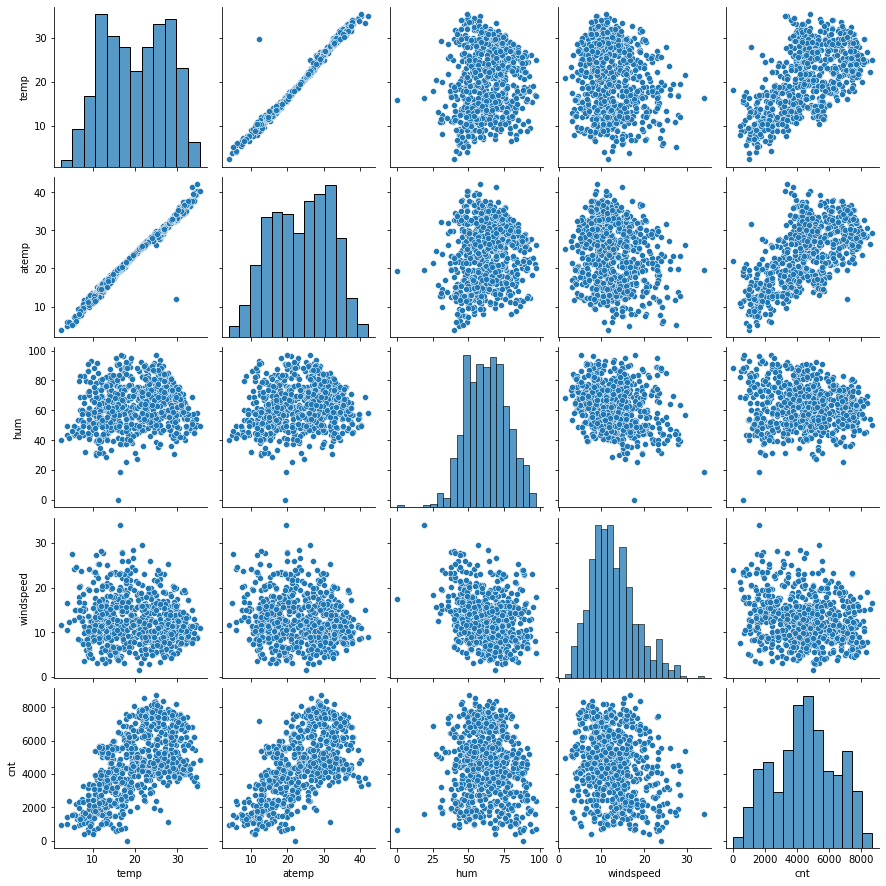

In [12]:
#Visualizing the Numerical Variables w.r.t Target Variable using Scatter/Pair Plots

sns.pairplot(df_bike[['temp','atemp','hum','windspeed','cnt']])
plt.show()

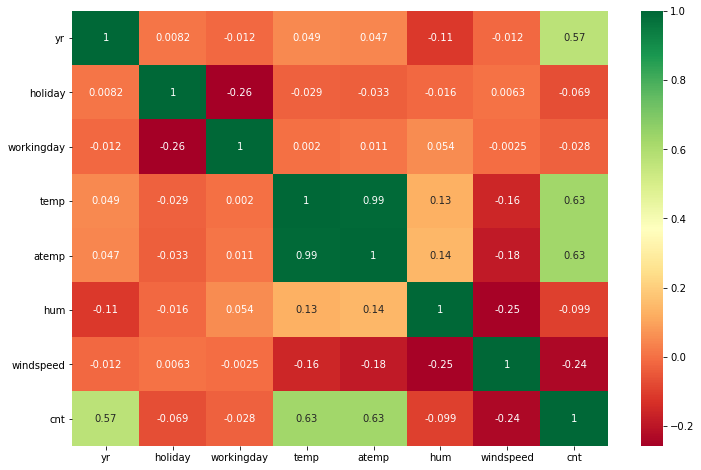

In [13]:
#Visualizing the Numerical Variables w.r.t Target Variable using Heatmap

plt.figure(figsize=[12,8])
sns.heatmap(df_bike.corr(),annot=True,cmap='RdYlGn')
plt.show()

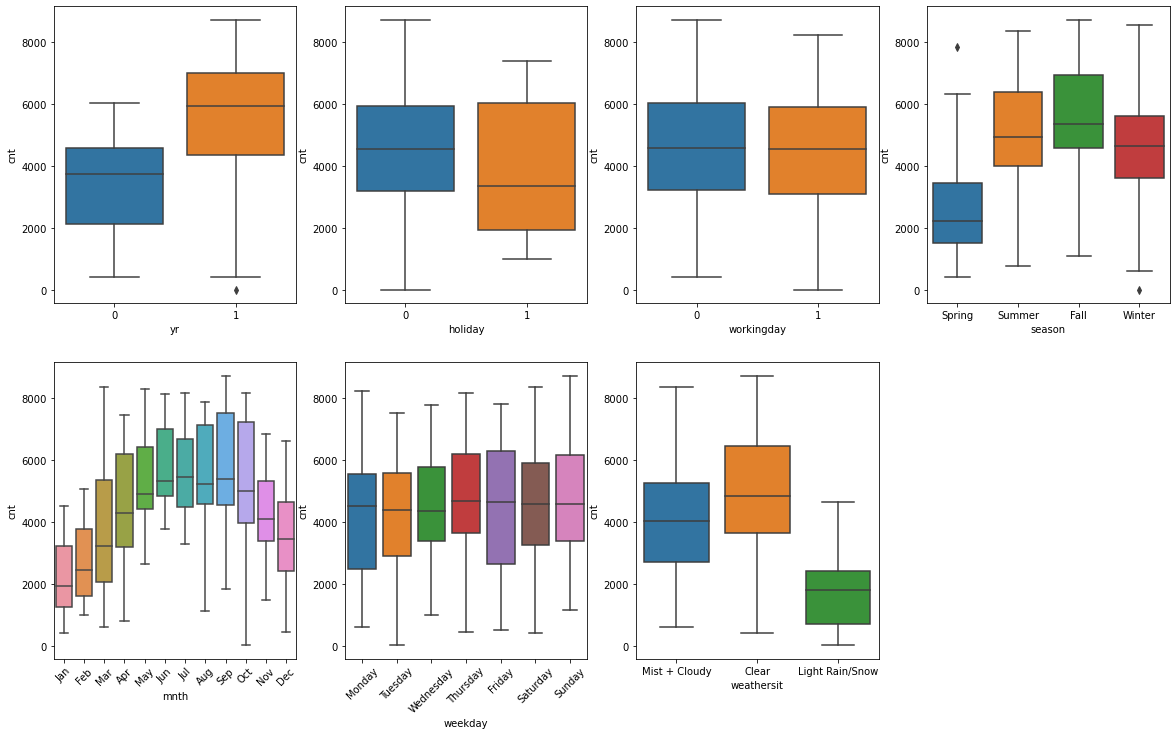

In [14]:
#Visualizing the categorical and binary variables w.r.t. target variable

plt.figure(figsize=[20,12])

plt.subplot(2,4,1)
sns.boxplot(data=df_bike,x='yr',y='cnt')

plt.subplot(2,4,2)
sns.boxplot(data=df_bike,x='holiday',y='cnt')

plt.subplot(2,4,3)
sns.boxplot(data=df_bike,x='workingday',y='cnt')

plt.subplot(2,4,4)
sns.boxplot(data=df_bike,x='season',y='cnt')

plt.subplot(2,4,5)
sns.boxplot(data=df_bike,x='mnth',y='cnt')
plt.xticks(rotation=45)

plt.subplot(2,4,6)
sns.boxplot(data=df_bike,x='weekday',y='cnt')
plt.xticks(rotation=45)

plt.subplot(2,4,7)
sns.boxplot(data=df_bike,x='weathersit',y='cnt')
plt.show()

From the visualization of the <b><u>Numerical Variables</u></b>, it seems that there is linear relationship between the the variables:
- 'cnt' and 'temp'
- 'cnt' and 'atemp'
- 'cnt' and 'windspeed'
- 'temp' and 'atemp' (since there seems to be a very strong relationship between these two independent variables, we will drop 'atemp' and use only 'temp' variable)

Whereas from the visualization of the <b><u>Categorical Variables</u></b>, it seems that there is some relationship between:
- 'cnt' and 'yr'
- 'cnt' and 'season'
- 'cnt' and 'month'
- 'cnt' and 'weathersit'

In [15]:
# Dropping 'atemp' column from the dataset

df_bike = df_bike.drop('atemp',axis=1)

In [16]:
# Creating dummy variables for all categorical columns

df_bike = pd.concat([df_bike,pd.get_dummies(df_bike['season'],drop_first=1)],axis=1)
df_bike = pd.concat([df_bike,pd.get_dummies(df_bike['mnth'],drop_first=1)],axis=1)
df_bike = pd.concat([df_bike,pd.get_dummies(df_bike['weekday'],drop_first=1)],axis=1)
df_bike = pd.concat([df_bike,pd.get_dummies(df_bike['weathersit'],drop_first=1)],axis=1)

In [17]:
df_bike = df_bike.drop(['season','mnth','weekday','weathersit'],axis=1)

In [18]:
df_bike.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain/Snow,Mist + Cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,8.378268,51.8261,6.000868,1606,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,0,8.057402,49.8696,11.304642,1510,1,0,0,...,0,0,0,0,1,0,0,0,0,1
7,0,0,1,6.765000,53.5833,17.875868,959,1,0,0,...,0,0,1,0,0,0,0,0,0,1
8,0,0,1,5.671653,43.4167,24.250650,822,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,1,6.184153,48.2917,14.958889,1321,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## 2.) Data Preparation for Modelling

In [19]:
# Splitting the dataset into train and test data

df_train, df_test = train_test_split(df_bike,train_size=0.7,random_state=100)

In [20]:
# checking the shapes of train dataset and test dataset

print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [21]:
# Rescaling the Numerical Variables using MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['temp','hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain/Snow,Mist + Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In this Assignment, we are going to rescale the target variable y (i.e. 'cnt') as well to reduce the spread of coefficients in our model interpretation. 

This is not mandatory and only effects the coefficients of the model while keeping any other statistics of the model without any change.

In [22]:
#Checking the effect of scaling on Numerical Variables of the train dataset

df_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


## 3.) Training the Model

In [23]:
# Splitting the train dataset into X_train and y_train

y_train=df_train.pop('cnt')
X_train=df_train

In [24]:
# Finding the top 10 variable using RFE 

lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,10)
rfe.fit(X_train,y_train)

rfe_cols = list(X_train.columns[rfe.support_])
rfe_cols

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'Summer',
 'Winter',
 'Jul',
 'Sep',
 'Light Rain/Snow']

Now since we have found the list of Top 10 Variables using RFE, we can proceed with building a model with these variables. 

Once a Linear Regression Model is built, we will check if reducing any of the variables have a positive effect on our model or not.

In [25]:
# Building model using statsmodels to get the detailed structure

X_train_rfe = X_train[rfe_cols]
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          2.79e-186
Time:                        14:19:06   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2682      0.026     10.292      0.000       0.217       0.319
yr                  0.2259      0.008     27.118      0.000       0.210       0.242
holiday            -0.0930      0.026     -3.543      0.000      -0.145      -0.041
temp                0.6200      0.023     27.492      0.000       0.576       0.664
hum                -0.2868      0.032     -9.045      0.000      -0.349      -0.224
windspeed          -0.2059      0.026     -7.889      0.000      -0.257      -0.155
Summer              0.0800      0.011      7.281      0.000       0.058       0.102
Winter              0.1390      0.011     12.903      0.000       0.118       0.160
Jul                -0.0482      0.018     -2.606      0.009      -0.085      -0.012
Sep                 0.0944      0.016      5.724      0.000       0.062       0.127
Light Rain/Snow    -0.1914      0.026     -7.470      0.000      -0.242      -0.141
==============================================================================
Omnibus:                       53.056   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.833
Skew:                          -0.655   Prob(JB):                     6.94e-21
Kurtosis:                       4.629   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Calculating VIF for each variable to check for multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,hum,10.29
2,temp,9.29
4,windspeed,3.54
0,yr,2.02
5,Summer,1.76
6,Winter,1.68
7,Jul,1.55
8,Sep,1.29
9,Light Rain/Snow,1.09
1,holiday,1.04


Once a Linear Regression Model is built using the Top 10 variables, it is evident that the R-squared of that Model is 0.832

After looking at the P-values and VIF of all the coefficients, we can clearly infer that the variable 'hum' should be dropped from this dataset. Although the P-value of this variable is considerable low (0.000), the Variance Inflation Factor for this variable is very high (10.29). 

By using the formula VIF = 1/(1-R^2), we can conclude that the R-squared of the model built with 'hum' as target variable and rest of the 9 variables (out of Top 10 variables) is 0.903. This means that 90.3% of variance for the variable 'hum' can be explained by rest of the 9 variables. 

<u>Hence we can safely drop the variable 'hum' without much negative impact on our model.</u>

In [27]:
# Re-building the model using Top 9 variables (after dropping 'hum')

X_train_rfe = X_train_rfe.drop('hum',axis=1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_rfe_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.0
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          4.42e-171
Time:                        14:19:06   Log-Likelihood:                 455.47
No. Observations:                 510   AIC:                            -890.9
Df Residuals:                     500   BIC:                            -848.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0840      0.018      4.794      0.000       0.050       0.118
yr                  0.2329      0.009     26.061      0.000       0.215       0.251
holiday            -0.0875      0.028     -3.094      0.002      -0.143      -0.032
temp                0.5854      0.024     24.438      0.000       0.538       0.632
windspeed          -0.1459      0.027     -5.365      0.000      -0.199      -0.092
Summer              0.0750      0.012      6.346      0.000       0.052       0.098
Winter              0.1228      0.011     10.731      0.000       0.100       0.145
Jul                -0.0313      0.020     -1.578      0.115      -0.070       0.008
Sep                 0.0822      0.018      4.640      0.000       0.047       0.117
Light Rain/Snow    -0.2524      0.027     -9.477      0.000      -0.305      -0.200
==============================================================================
Omnibus:                       60.888   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.629
Skew:                          -0.747   Prob(JB):                     3.14e-23
Kurtosis:                       4.625   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Calculating VIF again for each variable to check for multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,4.96
3,windspeed,3.01
0,yr,2.00
4,Summer,1.75
6,Jul,1.51
5,Winter,1.43
7,Sep,1.28
8,Light Rain/Snow,1.06
1,holiday,1.03


After building the Linear Regression Model on the Top 9 variables, it is evident that the R-squared of that Model has reduced to is 0.805

After looking at the P-values and VIF of all the coefficients, we can clearly infer that the variable 'Jul' should be dropped from this dataset. Although the Variance Inflation Factor for this variable is considerable low (1.51), the P-value of this variable is high (0.115 i.e. p-value > 0.05).

This means that the effect of variable 'Jul' is insignificant with respect to the target variable 'cnt'.

<u>Hence we can safely drop the variable 'Jul' without much negative impact on our model.</u>

In [29]:
# Re-building the model using Top 8 variables (i.e. after dropping 'Jul' as well)

X_train_rfe = X_train_rfe.drop('Jul',axis=1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_rfe_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          9.22e-172
Time:                        14:19:06   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0875      0.017      5.029      0.000       0.053       0.122
yr                  0.2334      0.009     26.093      0.000       0.216       0.251
holiday            -0.0867      0.028     -3.060      0.002      -0.142      -0.031
temp                0.5682      0.021     26.580      0.000       0.526       0.610
windspeed          -0.1455      0.027     -5.340      0.000      -0.199      -0.092
Summer              0.0812      0.011      7.256      0.000       0.059       0.103
Winter              0.1261      0.011     11.179      0.000       0.104       0.148
Sep                 0.0895      0.017      5.229      0.000       0.056       0.123
Light Rain/Snow    -0.2535      0.027     -9.506      0.000      -0.306      -0.201
==============================================================================
Omnibus:                       62.269   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.317
Skew:                          -0.761   Prob(JB):                     8.20e-24
Kurtosis:                       4.640   Cond. No.                         9.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Calculating VIF again for each variable to check for multicollinearity

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,yr,2.00
4,Summer,1.55
5,Winter,1.34
6,Sep,1.20
7,Light Rain/Snow,1.06
1,holiday,1.03


After building this model, we can clearly see that the p-values of all these variables are below 0.05. Also, the VIF for all variables are below 5.

#### Hence we can finalize this as our Multiple Linear Regression Model with an R-squared of 0.804 on train dataset.

## 4.) Residual Analysis

In [31]:
# Doing residual analysis on train dataset

y_train_pred = lr_model.predict(X_train_rfe_sm)
y_train_pred

576    0.745645
426    0.535189
728    0.363765
482    0.599516
111    0.309756
         ...   
578    0.784657
53     0.186455
350    0.291815
79     0.354484
520    0.690854
Length: 510, dtype: float64

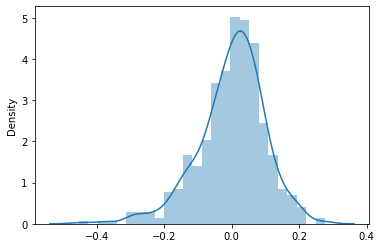

In [32]:
# Calculating the the Residuals between the predicted and actual values of the target variable
# Also plotting a distribution plot of the residuals

res = y_train - y_train_pred
sns.distplot(res)
plt.show()

From the Distribution Plot of the residuals between the actual target variable and predicted target variable, it is evident that the distribution of the residuals in <b><u>Normally Distributed</u></b> and is centered around 0.

From this, we can easily infer that the assumptions of the Linear Regression hold true for our model.

## 5.)  Prediction and Evaluation on the Test Dataset

In [33]:
# Performing same Pre-processing on test dataset that was done on train dataset

num_vars = ['temp','hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain/Snow,Mist + Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [34]:
# Describing Numberical variables in the Test dataset

df_test[num_vars].describe()

,temp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.638221,0.313293,0.522154
std,0.233187,0.148694,0.159584,0.219163
min,0.046591,0.261915,-0.042808,0.048205
25%,0.355429,0.529197,0.198843,0.378595
50%,0.558172,0.625590,0.300126,0.524678
75%,0.755981,0.743798,0.402718,0.677750
max,0.984424,1.002146,0.807474,0.963300


Here we can see that the Min and Max value is clearly <b><u>not</u></b> 0 and 1 respectively. This is due to the fact that the Scaler has been fit on the train dataset and we are using the same scaler to do the pre-processing on the test dataset.

In [35]:
# Splitting the test dataset into X_test and y_test

y_test = df_test.pop('cnt')
X_test = df_test[rfe_cols]

In [36]:
# Dropping the columns from the test dataset that were dropped from the train dataset 
# because we do not have the coefficients for these columns

X_test_sm = X_test.drop(['hum','Jul'],axis=1)

In [37]:
# Adding constant in the test dataset

X_test_sm = sm.add_constant(X_test_sm)

In [38]:
# Predicting the values of y for test dataset from the Linear Regression Model that we built

y_test_pred = lr_model.predict(X_test_sm)

In [39]:
# Checking R-squared for the test dataset

from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7720731949554799

### Hence the R-squared of the Test dataset is 0.772.

Interpretation of Linear Regression Model for BoomBikes:

##### cnt = 0.0875 + (0.2334 * yr) - (0.0867 * holiday) + (0.5682 * temp) - (0.1455 * windspeed) + (0.0812 * Summer) + (0.1261 * Winter) + (0.0895 * Sep) - (0.2535 * Light Rain/Snow) 


<b>Please Note:</b> This model has been built after rescaling the dependent and independent variables using Min Max Scaling.